## Self-Case Study -1: Healthcare Provider Fraud Detection Analysis

## Introduction:

#### What is Healthcare Fraud?
Fraud is defined as any deliberate and dishonest act committed with the knowledge that it could result in an unauthorized benefit to the person committing the act or someone else who is similarly not entitled to the benefit. Healthcare fraud is one of the types of fraud.
Here we will analyze and detect “Healthcare Provider Fraud” where the provider fills all the details and makes a claim on behalf of the beneficiary. Provider Fraud is one of the biggest problems that Medicare is facing currently.  Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.
As per the U.S. legislation, an insurance company should pay a legitimate healthcare claim within 30 days. So, there is very less time to properly investigate this. Insurance companies are the most vulnerable institutions impacted due to these bad practices.  As per the Government, the total Medicare spending increased exponentially due to frauds in Medicare claims. 

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:
a)	Billing for services that were not provided.
b)	Duplicate submission of a claim for the same service.
c)	Misrepresenting the service provided.
d)	Charging for a more complex or expensive service than was actually provided.
e)	Billing for a covered service when the service actually provided was not covered.

## Business Problem:

Statistics shows that 15% of the total medicare expense are caused due to fraud claims. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Insuarance premium is also increasing day by day due to this bad practice. 

Our objective is to predict whether a provider is potentially fraudulent or probability score of that provider's fradulent activity and also find the reasons behind it as well to prevent the financial loss.

Depending on the probability score and fradulent reasons insurance company can accept or deny the claim or set up an investigation on that provider.

Find out the important features which are the reasons behind the potentially fraudlent providers. Such as if claim amount is high for a patient whose risk score is low, then it is suspicious.

Not only the financial loss is a great concern but also to protect the healthcare system so that they can provide quality and safe care to legitimate patients.

## ML Formulation:

Build a binary classification model based on the claims filled by the provider along with Inpatient data, Outpatient data, Beneficiary details to predict whether the provider is potentially fraudulent or not.

## Business Constraints:

1. Cost of misclassification is very high. False Negative and False Positive should be as low as possible.If fraudulent providers are predicted as non-fraudulent (False Negative) it is a huge financial loss to the insurer and if legitimate providers are predicted as fraudulent (False Positive) it will cost for investigation and also it's a matter of reputation of the agency.
2. Model interpretability is very important because the agency or insurer should justify that fraudulent activity and may need to setup a manual investigation. It should not be a black box type prediction.
3. Insurer should pay the claim amount to the provider for legitimate claims within 30 days. So, there is no such strict latency constraints but it should not take more than a day because depending on the output of the model the agency may need to setup an investigation.

In [1]:
import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive\Test-1542969243754.csv
archive\Test_Beneficiarydata-1542969243754.csv
archive\Test_Inpatientdata-1542969243754.csv
archive\Test_Outpatientdata-1542969243754.csv
archive\Train-1542865627584.csv
archive\Train_Beneficiarydata-1542865627584.csv
archive\Train_Inpatientdata-1542865627584.csv
archive\Train_Outpatientdata-1542865627584.csv


## Dataset column analysis:

In [2]:
import pandas as pd

Train = pd.read_csv("archive/Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("archive/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("archive/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("archive/Train_Outpatientdata-1542865627584.csv")

In [3]:
Test = pd.read_csv("archive/Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("archive/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("archive/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("archive/Test_Outpatientdata-1542969243754.csv")

In [4]:
Train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

#### Train-1542865627584.csv:
It consists of provider number and corresponding whether this provider is potentially fraud. Provider ID is the primary key in that table.

In [5]:
Test.columns

Index(['Provider'], dtype='object')

#### Test-1542969243754.csv:
It consists of only the provider number. We need to predict whether these providers are potentially fraud or not.

In [6]:
Train_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [7]:
Test_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

#### Outpatient Data (Train and Test):
It consists of the claim details for the patients who were not admitted into hospital, who only visited there. Important columns are explained below.

<b>BeneID:</b> It contains the unique id of each beneficiaries i.e patients. <br>
<b>ClaimID:</b> It contains the unique id of the claim submitted by the provider. <br>
<b>ClaimStartDt:</b> It contains the date when the claim started in yyyy-mm-dd format. <br>
<b>ClaimEndDt:</b> It contains the date when the claim ended in yyyy-mm-dd format. <br>
<b>Provider:</b> It contains the unique id of the provider. <br>
<b>InscClaimAmtReimbursed:</b> It contains the amount reimbursed for that particular claim. <br>
<b>AttendingPhysician:</b> It contains the id of the Physicican who attended the patient. <br>
<b>OperatingPhysician:</b> It contains the id of the Physicican who operated the patient. <br>
<b>OtherPhysician:</b> It contains the id of the Physicican other than AttendingPhysician and  OperatingPhysician who treated the patient. <br>
<b>ClmDiagnosisCode:</b> It contains codes of the diagnosis performed by the provider on the patient for that claim. <br>
<b>ClmProcedureCode:</b> It contains the codes of the procedures of the patient for treatment for that particular claim. <br>
<b>DeductibleAmtPaid:</b> It consists of the amount by the patient. That is equal to Total_claim_amount - Reimbursed_amount. <br>

In [8]:
Train_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [9]:
Test_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

#### Inpatient Data (Train and Test):
It consists of the claim details for the patients who were admitted into hospital. So, it consists 3 extra columns Admission date, Discharge date and Diagnosis Group code.

<b>AdmissionDt:</b> It contains the date on which the patient was admitted into hospital in yyyy-mm-dd format. <br>
<b>DischargeDt:</b> It contains the date on which the patient was discharged from the hospital in yyyy-mm-dd format. <br>
<b>DiagnosisGroupCode:</b> It contains group code for the diagnosis done on the patient.

In [10]:
Train_Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [11]:
Test_Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

<b>Beneficiary Data (Train and Test):</b> This data contains beneficiary KYC details like DOB, DOD, Gender, Race, health conditions (Chronic disease if any), State, Country they belong to etc. Columns of this dataset are explained below.

<b>BeneID:</b> It contains the unique id of the beneficiary.<br>
<b>DOB:</b> It contains the Date of Birth of the beneficiary.<br>
<b>DOD:</b> It contains the Date of Death of the beneficiary, if the beneficiary id deal else null.<br>
<b>Gender, Race, State, Country:</b> It contains the Gender, Race, State, Country of the beneficiary.<br>
<b>RenalDiseaseIndicator:</b> It contains if the patient has existing kidney disease.<br>
<b>ChronicCond_*:</b> The columns started with "ChronicCond_" indicates if the patient has existing that particular disease. Which also indicates the risk score of that patient.<br>
<b>IPAnnualReimbursementAmt:</b> It consists of maximun reimbursement amount for hospitalization anually.<br>
<b>IPAnnualDeductibleAmt:</b> It consists of premium paid by the patient for hospitalization anually.<br>
<b>OPAnnualReimbursementAmt:</b> It consists of maximun reimbursement amount for outpatient visit anually.<br>
<b>OPAnnualDeductibleAmt:</b> It consists of premium paid by the patient for outpatient visit anually.<br>

## Performance metric:
As the dataset in healthcare fraud is highly imbalanced(very few fraud cases) accuracy won't be the proper metric. An important initial step will be to plot the confusion matrix. Then we need to check the misclassification i.e. FP and FN. FN means the cases predicted by the model is legitimate but actually it is fraudulent. FP means the cases detected by the model is fraudulent, but actually it is legitimate.

So, the performance metrices are: <br>
<b>1. Confusion Matrix:</b> It is the table where TP, FP, TN, FN counts will be plotted. From this table we can visualize the performance of the model. <br>
<b>2. F1 Score:</b> F1 Score = 2(Precision * Recall)/(Precision + Recall) where Precision = TP/(TP+FP) and Recall = TP/(TP+FN). As F1 score consists of both Precision and Pecall it will be correct metric for this problem. <br>
<b>3. AUC Score:</b> AUC stands for Area Under ROC(Receiver Operating Characteristics) Curve. ROC plots TPR with respect to FPR for different thresholds. The area under the curve depends on the ranking of the predicted probability score, not on absolute values. <br>
<b>4. FPR and FNR:</b> As cost of misclassification is very high, we need to check the FPR and FNR separately, It should be as low as possible.

## Research-Papers/Solutions/Architectures/Kernels

Mention the urls of existing research-papers/solutions/kernels on your problem statement and in your own words write a detailed summary for each one of them. If needed you can include images or explain with your own diagrams. it is mandatory to write a brief description about that paper. Without understanding of the resource please don’t mention it.

## URL 1:

https://cpb-us-w2.wpmucdn.com/sites.gatech.edu/dist/4/216/files/2015/09/p70-Statistical-Methods-for-Health-Care-Fraud-Detection.pdf

## A survey on statistical methods for health care fraud detection
#### Jing Li, Kuei-Ying Huang, Jionghua Jin, Jianjun Shi

<h2>1. Introduction</h2>

Healthcare has become a major expenditure in US since 1980. Fraud and abuse are the main 2 reasons behind this. As a huge amout of money involved in healthcare sector (claim reimbursement), it is one of the major target of fraud.

<h2>2. Objective</h2>

Identify fraudulent claims:

1. To protect the insurance providers from great loss due to this bad practice.
2. To protect the healthcare systen so that they can provide quality and safe care to legitimate patients.
3. To reduce the cost of healthcare services.

<h2>3. Classification of fraudulent behaviors.</h2>

Mainly 3 parties are involved in healthcare fraud.
1. Service providers: Doctors, hospitals, ambulance companies, laboratories.
2. Insurance subscribers: Patients, Patients' employers
3. Insurance carriers: Who recieves premiums from subscribers and pay healthcare costs behalf of their subscribers.

Among these 3 types of fraud, fraud committed are service providers are highest in proportion. Therefore detection of service providers' fraud is the most urgent problem for improving quality and safety of healthcare syatem.

<h2>4. Data Preprocessing</h2>

An insurance claim involves the participation of an insurance subscriber(patient) and a service provider. The claim data has 2 characteristics. <br>

First, 1 table which consists of attributes to describe the behaviors of service provider and insurance subscribers.<br>

Second, Claim details table with unique service provider id, unique subscriber id and other details.

Obtain a global view of a service provider's behaviors over time by merging the datadets using primary key and foreign key. The global views help significantly in identifying the fraud comitted by service providers and by insurance subscribers.

<h4>4.1. Goal Setting</h4>

First it needs to be decided which type of fraud should be focused. Six types of fraud are as follows.

1. Ambulance Services
2. Skilled Nursing Facilities
3. Laboratory Services
4. Psychiatric Services
5. Home Health Services
6. New or expanded benefits under the Balanced Budget Act of 1997.

Domain experts have good knowledge which type of fraud happens the most.

<h4>4.2 Data Cleaning</h4>

Raw data should be cleaned and should be brought into a proper format irrespective of the input type. This step varies depending on the problem and the raw data.

<h4>4.3 Handling Missing Values</h4>

Missing values are common in healthcare data because some data is not collected due to irrelevance, inapplicability, omission, ignorance etc. As most statistical methods require complete set of data elements, these missing values should be imputed.

Two most popular imputation techniques are as follows.
1. hot-deck imputation: It fills in the missing values in an incomplete case using values from the most similar but complete cases of the same dataset.
2. regression imputation: A regression model is fitted for each variable with missing values with other variables without missing values as input variables(features)

<h4>4.4 Data Transformation</h4>

In this step raw claim data is converted into more relevent views. In this step first, tables are merged using primary keys and foreign keys. Then, features are created depending on the fraud type to be detected (as per goal). For example, if we want to detect provider fraud, we need to calculate average claim amount per provider, average number of claims per provider, total % of top service codes are claimed by the provider etc for a specific time period. Now in the new dataset there will be a unique primary key corresponding to the fraud type to be detected(if Provider fraud needs to be detected, the table should have provider id as primary key).

<h4>4.5 Feature Selection</h4>

In this phase many new features to be introduced depending on the dataset. Now these features should be further reduced with the help of domain experts manually. Then correlatin checks should be performed to delete the redundent features. After that forward or backward feature selection to be used to pick the top relevant features. It is observed from the statistics that in most of the cases 10-30 features are used.

<h4>4.6 Data auditing</h4>

In this step basic statistical analysis and visualization to be done to become familiar with the data. Need to plot the probability and distributions and try to understand the relation between the features.

<h2>5. Statistical modelling for fraud detection:</h2>

Statistical modelling for fraud detection are generally classified into 2 categories.
1. Supervised methods: This is used when labelled data (either fraud or legitimate) is available for training the model.
2. Unsupervised methods: This is used when we get only unlabelled data for training.

<h4>5.1 Supervised methods</h4>

The popular supervised methods which are used for healthcare fraud detection are Decision trees and Neural Networks.

<h4>Decision Trees:</h4> 
Decision trees can be used after doing the feature engineering. It has the ability to generate rules from the input feature and class label. It also has the ability to handle missing values if any. As Decision trees are inperpretable it is very much useful for healthcare fraud detection. The only disadvantage is if the dimension of the train dataset is large it generates too many rules, thus tends to overfit. To get rid of that ensemble models like adaptive boosting is incorporated. Using ensemble models various classifiers are constructed sequentially with each focused on those training cases that have been misclassified by previous classifiers.

<h4>Neural networks:</h4>

Neural networks can fit into nonlinear data. So, feature engineering is less important for NN. The problem with NN is overfitting, to get rid of that 'earlystopping' can be introduced. NN model is robust to outliers because of the activation functions used(relu, sigmoid).

<h4>5.2 Unsupervised methods:</h4>

Unsupervised methods are used when data provided is not labelled. In this method, the data is divided into clusters to detect suspicious behaviour. 'Kmeans' is one of the unsupervised method.

<h2>6. Performance Metric for Supervised methods:</h2>

In this section different ways of evaluating performance of binary classifiers is discussed. Here the target metric is either fraudulent or legitimate.

As the dataset in healthcare fraud is highly imbalanced(very few fraud cases) accuracy won't be the proper metric. An important initial step will be to plot the confusion matrix. Then we need to check the misclassification i.e. FP and FN. FN means the cases predicted by the model is legitimate but actually it is fraudulent. FP means the cases detected by the model is fraudulent, but actually it is legitimate.

There are two ways of evaluating performance based on confusion matrix.

1. Cost based method: If the costs of FN and FP are explicitly specified, we can adopt this. FN cost means how much money we are losing if a fraudulent claim can not be detected. FP cost means if a legitimate claim is detected as fraudulent, how much needs to be spent for investigation.

2. Error based method: In that case ROC curve is commpnly used, which plots TP against FP rates at different decision making thresholds of a classifier. Then the Area Under that curve (AUC) is calculated which indicates the discriminating power of the classifier. If AUC=1 the classifier works perfectly and if AUC=0.5 if performs randomly.<br> Apart from AUC, F1 score can also be taken as performance metric.

<h2>7. Conclusion:</h2>

Overall objective of this research is to develop fraud detection methods and algorithms that are scalable, accurate and fast. Scalable refers to capability of handling immence volume of healthcare data. Accurate refers to low errors/costs induced by false alarms and misdetection of fraud. Fast refers to the capability of catching frauds in real time before they incur severe loss and damage.

<h2>8. How this paper useful in my case study:</h2>

I can apply the similar approach in my case study.<br>
<b>1. Filling missing values: </b> I can use model based imputation technique to fill the null vales of the numerical columns if any. Such as Annual deductible amount, Annual reimbursement amount, Insurance claim amoutnt reimbursed, deductible amount paid. <br>
<b>2. Get a global view:</b> I need to merge the 4 dataset given for my case study after preprocessing to get a global view of patients and providers.<br>
<b>3. Data Transformation/ Feature Engineering:</b> From the overall merged dataset, we can find out average claim amount reimbursed per provider, total number of claims per provider etc.<br>
<b>4. Removing Redundent features:</b> First I can do a correlation check on the extracted features, then remove the correlated features followed by forward feature selection if required.<br>
<b>5. Model Selection: </b> As I have labelled data, I will adopt supervised learning using Decision trees and AUC score, FPR, FNR as performance metric. To improve the performance I can use ensemble models.

# URL2:

https://www.aaai.org/ocs/index.php/FLAIRS/FLAIRS18/paper/download/17617/16814

### The Detection of Medicare Fraud Using Machine Learning Methods with Excluded Provider Labels

#### Richard A. Bauder, Taghi M. Khoshgoftaar

<h2>1. Introduction:</h2>

The total healthcare spending in US ishigh and the impact of healthcare fraud is estimated to be between 3% to 10% of the nation's total healthcare spending which adversely impacting the Medicare program.

<h2>2. Approach followed:</h2>

Build a ML model using publicly available claims data and labels for known fradulent medical providers accross all medical specialities or provider types. The model to be built is not distinct model per speciality, but rather one model to predict a fraudulent provider regardless of speciality.

Dataset used here is highly imbalanced i.e. significantly more non-fraud versus fraud labels. To mitigate the adverse effects of class imbalance on detecting fraud random undersampling(RUS) is employed. RUS retains all fraud labels while randomly reducing non fraud labels. As medicare data itself is a very big data, random oversampling will further increase the dataset size which will become a burden to ML models.

Using random undersampling 4 datasets are created with 4 different class distributions (non-fraud:fraud ratio = 80:20, 75:25, 65:35, 50:50). For each distribution 3 different models(decision tree, logistic regression, support vector machine) are created. For each of these models 5-fold cross validation is performed with 10 times repetition to reduce the bias caused by sampling. Area under ROC curve(AUC), False Positive Rate(FPR) and False Negative Rate(FNR) are considered as performance metric. The ROC curve is used to characterize the trade-off between TPR and FPR and depicts learner's performance accross all decision thresholds.After training all these models, decision trees and logistic regression worked best with maximun AUC score for 80:20 and 75:25 ratios(non-fraud:fraud).

<h2>3. How this paper useful in my case study:</h2>

Here the model is not distinct per speciality, I can apply the same approach in my problem as speciality is not explicitely mentioned in the data provided. I can do random undersampling with 4 different ratios and then 5 fold crossvalidation with 10 times repetition. For each distribution use decision trees, logistic regression and SVM as model with AUC as performance metric. Compare the performance accross each distributions and models then pick the best one.

<h2>URL 3</h2>

https://www.roselladb.com/healthcare-fraud-detection.htm#:~:text=Healthcare%20fraud%20detection%20involves%20account,feasible%20by%20any%20practical%20means.

### Machine Intelligence & Data Mining in Healthcare Fraud Detection

In this blog it is discussed how fraud techniques are used in healthcare and how we can extract features out of it to predict fraudulent activity. The following are the typical type of fraud techniques.

1. Providers billing for services not provided.
2. Providers administering (more) tests and treatments or providing equipments that are not medically necessary.
3. Providers administering more expensive tests and equipments (up-coding).
4. Providers multiple-billing for services rendered.
5. Providers unbundling or billing separately for laboratory tests performed together to get higher reimbursements.
6. Providers charging more than peers for the same services.
7. Providers conducting medically unrelated procedures and services.
8. Policy holders traveling long distance for treatment which may be available nearby. (Possibly scams by bogus providers.)
9. Policy holders letting others use their healthcare cards.

<h4>Statistical healthcare fraud detection techniques:</h4>

Fraudulent activity can be identified by analyzing statistics of patients, doctors and providers. Higher per-patient costs, excessive per-doctor patients, higher per-patient tests are suspicious.

1. The effect of fraudulent activities are more number of claims than ususal as a result claim amount will be more per provider. So, we need to analyze each provider's total claim amount in a specific time period.
2. The average billing per patient will also be higher. So, average billing per patient needs to be analysed for every provider.
3. Total number of patients per provider needs to be analyzed to check if this is suspicious.
4. Average visit per patient to be calculated to check if this is more than ususal.
5. Average number of tests per patient needs to be analyzed.
6. Average medical tests cost per patient to check if this is high i.e suspicious.
7. Average number of prescriptions per patient, this is also an indication of number of hospital visit/checkup of the patient.
8. Doctors who treated patients more than ususl are suspicious.
9. Providers administering far higher rates of tests than others.
10. Providers costing far more, per patient basis, than others.
11. Providers with high ratio of distance patients. It is not natural that patients visit providers which are far than near.
12. Providers prescribing certain drugs at higher rate than others. Even though drugs with less price can be used for that disease.

Key takeaway from this blog is excesssive fraudulent claims lead deviations in aggregate claims statistics in terms of cost and number of claims. Fraudulent claims often occour into patterns that can be detected using predective modelling.

Predictive ML models can be trained after extracting the above features from the historical data. If class labels are available, supervise models are used otherwise unsupervised models.

<h4>How this blog useful in my case study:</h4>

This blog mainly discuss about the statistical analysis that can be performed on the data provided. I can use this leasson for feature engineering such as Average billing per patient for every provider, average no of claims per patient for every provider and so on.

## URL 4:

https://www.sciencedirect.com/science/article/pii/S2212017313002946

#### Predicting Healthcare Fraud in Medicaid: A Multidimensional Data Model and Analysis Techniques for Fraud Detection 

This paper discuss about different type of relationships between patient, provider, clim, policy and other factors. After analysing these we predict which all behaviour are suspicious.

#### Some of the most prevalent known Medicaid frauds are:

1. Phantom Billing – Submitting claims for services not provided.
2. Duplicate Billing – Submitting similar claims more than once.
3. Bill Padding – Submitting claims for unneeded ancillary services to Medicaid.
4. Upcoding – Billing for a service with a higher reimbursement rate than the service provided.
5. Unbundling – Submitting several claims for various services that should only be billed as one service.
6. Excessive or Unnecessary Services – Provides medically excessive or unnecessary services to a patient.
7. Kickbacks – A kickback is a form of negotiated bribery in which a commission is paid to the <br> bribe-taker (provider or patient) as a quid pro quo for services rendered.

#### Some of the Analysis Techniques for Fraud Detection:

Based on the overall description given the following features can be extracted.
1. Covered charges
2. Non-covered charges
3. Total charges
4. Units of service
5. Number of days between claim filled and paid
6. Number of days between service and claim paid
7. Distance between provider and patient
8. Number of days between service and claim filled
9. Covered price per unit
10. Total price per unit
11. Treatment duration

#### Some of the relationships and between patient, provider and claim to detect suspicious behaviour.

1. One claim with it's relevant patient provider: Using this data duplicate claims can be detected.
2. A patient and a provider including all claims: Duplicate bills as well as Unbundling could be discovered looking at multiple services from the same provider.
3. All claims and Providers treating a single claim: Phantom billing could be discovered looking at patient claims vs prior medical history. Duplicate billing, duplicate service all these can be checked from this data.
4. Provider's Service Distribution frequency against peers: Clustering analysis of these profiles shows distribution outliers and frequency outliers which should be evaluated by medical SMEs for validation.
5. Analyzing claim pattern differences accross different insurance polices or insurers: Patient distributions accross insurers can be checked. Providers with high proportions of patients and claims billing specific programs should be evaluated closely.

<h4>How this paper useful in my case study:</h4>

1. This paper discuss about different types of charges and activities associates with a claim such as total charges, units of service, total price per unit, covered price per unit, treatment duration etc. These statistics can be used as new feature to ML model.

2. In this paper it is also discussed which type of fraud can be detected at which level. If we take one claim with it's relevent patient we can detect duplicate claims. A patient and a provider incliding all claims helps us to detect duplicate claims as well as unbundling. Thus I can group overall dataset accordingly and introduce new feature.

## URL 5:

https://www.kaggle.com/roshankhatri03/kernel83ef294a68

## kernel83ef294a68

<h4>Summary of the Solution:</h4>


<h4>EDA</h4>
In EDA section first all the input datasets are analyzed such as most comman procedure, most common diagnosis for inpatient as well as outpatient patient. The percentage of fraudulent claims are also calculated on inpatient and outpatient data. Localities with most fraudulent activities are plotted. How much amount of loss happened due to these fraudulent activities and what is the fraudulent percentage of total amount of reimbursement.

<h4>Feature Engineering:</h4>
Calculate Age of every patient depending on DOB and DOD. If DOD is not available calculate the age based on the date of claim in the dataset i.e. the time when the data was collected.

<h4>Merging the datasets:</h4>
1. First merge Inpatient data with Outpatient data on beneficiary ID.
2. Merge Patient details on Beneficiary Id with Patient data.
3. Then merge the class labels on provider with the previously merged dataframe using inner join.
4. Now gorup the dataframe based on provider id and extract some new features like total amount reimbursed per provider, average imbursed amount per patient per provider, per patient claims per provider etc.

<h4>Model selection and training:</h4>
Used Naive Bayes, Logistic Regression, XGBoost models and AUC score as performance metric.

<h4>How this is useful:</h4>

I got an overview of the dataset form this solution and how to do basic EDA. Train AUC achieved in this solution is 0.60, I will do further analysis and try to improve the score.

In [12]:
# count the values of fraud and non fraud providers in the given dataset.
Train.groupby(["PotentialFraud"]).Provider.count()

PotentialFraud
No     4904
Yes     506
Name: Provider, dtype: int64

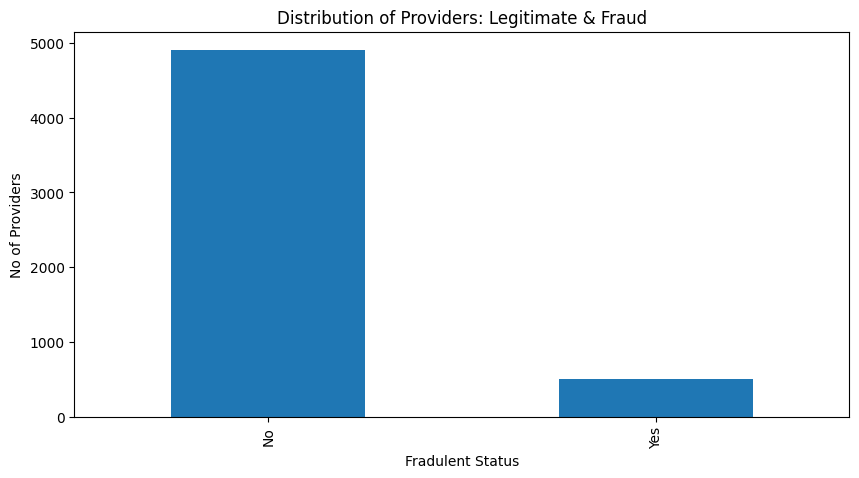

In [13]:
import matplotlib.pyplot as plt

plt.title("Distribution of Providers: Legitimate & Fraud")
Train.groupby(["PotentialFraud"]).Provider.count().plot(kind = "bar", figsize = (10,5))
plt.xlabel('Fradulent Status')
plt.ylabel('No of Providers')
plt.show()

# First Cut Approach
Explain in steps about how you want to approach this problem and the initial experiments that you want to do. (MINIMUM 200 words) <br>

When you are doing the basic EDA and building the First Cut Approach you should not refer any blogs or papers.


<h2>Data Cleaning and EDA</h2>

First I will check each and every dataset provided and try to extract informations from it.

<h4>Provider Dataset:</h4>

I will check the distribution of Fraudulent and Non-Fraudulent claims. I have already checked it and I can see there are 506 fraudulent provider(10%) and 4904 non fraudulent providers(90%), which is a highly imbalanced dataset. To mitigate that imbalance I can use either undersampling or oversampling. In a paper discussed above, random undersampling was used because of the very big size of the input data. But here the data size is not big so, I can use random oversampling technique for my case study. (I will try random undersampling as well to check which one is performing best.)

<h4>Beneficiary Data:</h4>
1. From the KYC details of the beneficiaries I can calculate the age of the patients. For those, whose DOD is not available I will consider the last date available from other dataset.<br>
2. I will check for the other columns if there are any missing values. I need to imputhe the missing values based on domain knowledge or model based approach. If any of the chronic disease field is missing I will apply domin knowledge to impute it with yes or no. If annual reimbursement or annual deductible amount field is missing I can create a regression model to predict these values.<br>
3. From the chronic disease fields of the patient I can calculate the risk score. If the patient has a particular chronic disease it has to be filled with 1 else 0. I can sum up all the columns of chronic disease for a patient to calculate the risk score. Risk score is an important feature in fraud detection. If patient with low risk score is claiming high amount this is suspicious.<br>
4. I will plot countplot of Gender, State, Country to check which are the most occouring in the dataset.<br>
5. I will plot PDF of AnnualDeductible amount and AnnualReimbursed amount to check the distribution and also to find the outliers.<br>

<h4>Inpatient/Outpatient Data:</h4>
1. From the claim start date and claim end date I will calculate total number of days of the claim. If any of the field is missing I will try to apply domain knowledge to impute that. It may be average number of claim date from the other patients or depending on the claim type.
2. For all the Inpatients I need to calculate total number of admitted days in hospital in the similar way.
3. Need to check Claim Reimbursed amount column. If there is any missing values I have to impute that using domain knowledge or model based approach.
4. I will plot the count plot of attending physician, operating ohysician for inpatient as well as outpatient to check which all doctors are treating the patients most.
5. I will plot the PDF of reimbursed amount to check the distribution for inpatient as well as outpatient.
6. Add another column called "TotalNoOfPhysiciansAttended". That is equal to Attending + Operating + Other physicians.
7. I will add another column called "HospitalizationStatus" in both the datasets, for Inpatients I will fill it with 1 and for outpatients with 0. So that after merging these claims can be distinguished.

<h4>Merge Datasets:</h4> I will merge all these datasets to get a global view of the data. First merge Inpatient and Outpatient data based on Claim ID then merge it whih Beneficiary data on BeneficiaryID and then merge the Provider dataset on ProviderID. Now all the data combined in a single dataframe.

<h4>Feature Engineering and EDA after Merging the Datasets:</h4>

<b>EDA:</b>
1. I will plot countplot of Fraudulent and Legitimate claims to check the distribution in the claim data.<br>
2. Now I will plot the countplots separately for Fraudulent and Legitimate claims on state, race, gender to check top types associated with fraudulent claims.<br>
3. Countplot of Attending and Operating phisician separately for Fraudulent and Legitimate claims and check the top attending physians.<br>

<b>Feature Engineering:</b>
1. Calculate average reimbursement received by patient. Average reimbursement = Total reimbursement received/no of claims.<br>
2. Total number of claims per patient.<br>
3. Average number of claim days per parient. Avg no of claim days = Total claim days/ Total no of claims.<br>
4. Average number of hospitalization days per patient. Avg no of days hospitalized = Total No of days hospitalized/No of times hospitalized.<br>

Now group the data based on ProviderID as our objective is to predict potentially fraudulent providers and take the sum of all the features applicabe(Total amount deducted, total amount reimbursed, risk score of patients, chronic conditions, total number of days admitted, total number of days claimed, number of unique claims, number of impatients, total claims for patient, avg no of days patient was admitted, avg no of hospitalization days etc. )

Now I will do feature selection using Random Forest to pick the important features.
So, I will get 2 separate dataframes one with all the features another with only important features. I will use both and pick the best one depending on the performance.

<h2>Performance Metric:</h2>
1. AUC score
2. F1 Score
3. Confusion Matrix
4. Check FPR and FNR separately

<h2>Train-Test Split and Oversampling:</h2>

As our dataset is imbalanced Legitimate:Fraudulent = 90:10, I need to do oversampling. First I will split the data into Train and Test (Because if oversampling is done first, crossvalidation may contain train data) then I will do oversampling to make 4 sets of data with ratio 80:20, 75:25, 65:35 and 50:50.

<h2>Model Selection and Approach to be followed:</h2>

I will use Logistic Regression, Decision Trees, Naive Bayes and SVM for this classification task. For each model, I will do 5 fold cross validation for 10 times then I will take the average. I will compare the scores and pick the best model.

I will do further hyperparameter tuning to get better score.

For further improvement I will use ensemble models.